In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

## 朴素贝叶斯

In [4]:
digits = load_digits()
X, y = digits.data, digits.target
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

In [9]:
print(Xtrain.shape) #64个特征
print(np.unique(Ytrain)) # 10个分类

(1257, 64)
[0 1 2 3 4 5 6 7 8 9]


### 高斯朴素贝叶斯

In [12]:
gnb = GaussianNB().fit(Xtrain,Ytrain)
#查看分数
acc_score = gnb.score(Xtest,Ytest)
print(acc_score)
#查看预测结果
Y_pred = gnb.predict(Xtest)
print(Y_pred)

0.8592592592592593
[6 1 3 0 4 5 0 8 3 8 6 8 7 8 8 8 5 9 5 6 5 4 7 4 8 2 7 2 8 9 2 8 3 6 0 3 8
 8 1 5 2 8 8 9 2 2 0 7 3 6 7 2 8 0 5 4 1 9 4 0 5 8 9 1 7 8 7 5 8 2 4 4 8 2
 6 1 2 1 7 8 8 5 9 4 3 6 9 7 4 2 4 8 0 5 7 7 7 4 7 8 8 7 0 7 2 1 9 9 8 7 1
 5 1 8 0 4 8 9 5 6 4 8 3 8 0 6 8 6 7 6 1 8 5 0 8 2 1 8 8 6 6 0 2 4 7 8 9 5
 9 4 7 8 8 6 7 0 8 4 7 2 2 6 4 4 1 0 3 4 3 8 7 0 6 9 7 5 5 3 6 1 6 6 2 3 8
 2 7 3 1 1 6 8 8 8 7 7 2 5 0 0 8 6 6 7 6 0 7 5 5 8 4 6 5 1 5 1 9 6 8 8 8 2
 4 8 6 5 9 9 3 1 9 1 3 3 5 5 7 7 4 0 9 0 9 9 6 4 3 4 8 1 0 2 9 7 6 8 8 0 6
 0 1 7 1 9 5 4 6 8 1 5 7 7 5 1 0 0 9 3 9 1 6 3 7 2 7 1 9 9 8 3 3 5 7 7 7 3
 9 5 0 7 5 5 1 4 9 2 0 6 3 0 8 7 2 8 1 6 4 1 2 5 7 1 4 9 5 4 2 3 5 9 8 0 0
 0 0 4 2 0 6 6 8 7 1 1 8 1 1 7 8 7 8 3 1 4 6 1 8 1 6 6 7 2 8 5 3 2 1 8 7 8
 5 1 7 2 1 1 7 8 9 5 0 4 7 8 8 9 5 5 8 5 5 8 1 0 4 3 8 2 8 5 7 6 9 9 5 8 9
 9 1 8 6 4 3 3 3 3 0 8 0 7 7 6 0 8 9 8 3 6 6 8 7 5 8 4 5 8 6 7 6 7 7 8 0 8
 2 2 0 5 7 3 0 2 8 2 0 2 3 6 8 1 7 5 7 1 7 7 2 7 5 2 6 5 8 0 0 8 1 3 7 6 1
 5 6 2

In [20]:
prob = gnb.predict_proba(Xtest)
print(np.around(prob[:5], 3)) #前5个样本的分类概率

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


使用混淆矩阵查看多分类结果：   
列含义：表示真实分类
行含义：表示预测分类

In [21]:

from sklearn.metrics import confusion_matrix as CM
CM(Ytest,Y_pred)


#注意，ROC曲线是不能用于多分类的。多分类状况下最佳的模型评估指标是混淆矩阵和整体的准确度

array([[47,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0, 46,  2,  0,  0,  0,  0,  3,  6,  2],
       [ 0,  2, 35,  0,  0,  0,  1,  0, 16,  0],
       [ 0,  0,  1, 40,  0,  1,  0,  3,  4,  0],
       [ 0,  0,  1,  0, 39,  0,  1,  4,  0,  0],
       [ 0,  0,  0,  2,  0, 58,  1,  1,  1,  0],
       [ 0,  0,  1,  0,  0,  1, 49,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  0],
       [ 0,  3,  0,  1,  0,  0,  0,  2, 55,  0],
       [ 1,  1,  0,  1,  2,  0,  0,  3,  7, 41]], dtype=int64)

In [22]:
Xtrain[1]

array([ 0.,  0.,  4., 12., 16., 14.,  7.,  0.,  0.,  2., 16.,  6.,  0.,
        7., 12.,  0.,  0.,  0.,  7.,  0.,  3., 13.,  3.,  0.,  0.,  0.,
        0.,  1., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,
        0.,  0.,  0.,  2.,  0.,  0., 13.,  5.,  0.,  0.,  3., 16.,  7.,
        1., 12.,  4.,  0.,  0.,  0.,  3., 12., 16., 15.,  2.,  0.])

拟合效果和运算速度

In [30]:
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LR

from sklearn.model_selection import ShuffleSplit, learning_curve
from time import time
import datetime

In [24]:
def plot_learning_curve(estimator,title, X, y, 
                        ax, #选择子图
                        ylim=None, #设置纵坐标的取值范围
                        cv=None, #交叉验证
                        n_jobs=None #设定索要使用的线程
                       ):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y
                                                           ,cv=cv,n_jobs=n_jobs)    
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid() #显示网格作为背景，不是必须
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-'
           , color="r",label="Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-'
           , color="g",label="Test score")
    ax.legend(loc="best")
    return ax

In [26]:
digits = load_digits()
X, y = digits.data, digits.target
print(X.shape)
X #是一个稀疏矩阵

(1797, 64)


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [28]:
title = ["Naive Bayes","SVM, RBF kernel","RandomForest","Logistic"] 
model = [GNB(), SVC(gamma=0.001), RFC(n_estimators=50), LR(C=.1,solver="lbfgs")]
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

Naive Bayes:00:01:873027
SVM, RBF kernel:00:21:586458
RandomForest:00:16:381668
Logistic:00:10:967109


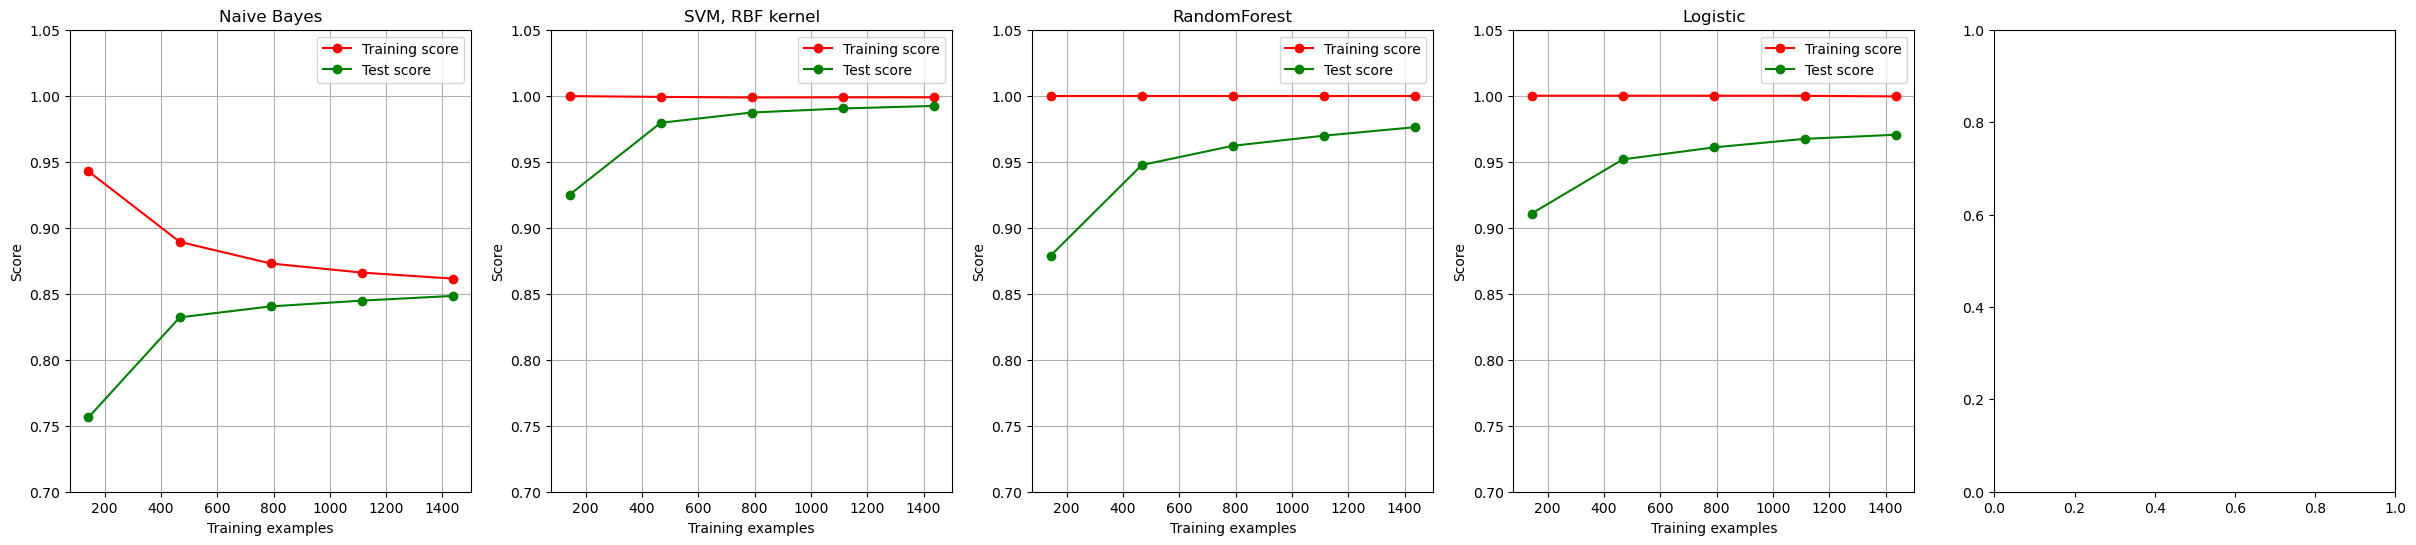

In [31]:
fig, axes = plt.subplots(1,5,figsize=(20,5))
for ind,title_,estimator in zip(range(len(title)),title,model):
    times = time()
    plot_learning_curve(estimator, title_, X, y,
                        ax=axes[ind], ylim = [0.7, 1.05],n_jobs=4, cv=cv)
    print("{}:{}".format(title_,datetime.datetime.fromtimestamp(time()-
times).strftime("%M:%S:%f")))
plt.show()

In [36]:
s1 = time()
s1

1684117009.2915237

In [38]:
s2 = time()
s2

1684117014.7634368

In [42]:
dt = datetime.datetime.fromtimestamp(s2-s1)
dt

datetime.datetime(1970, 1, 1, 8, 0, 5, 471913)

In [46]:
dt.strftime("%M:%S:%f") #输出分:秒:微秒

'00:05:471913'